In [1]:
'''Analisis:
- All the data (list = patient with all values)
- BandPower = patient = 12 brain reagions = 5 bands = 1 value
- Lavels structure all patiens with one value = list (no shape)'''

'Analisis:\n- All the data (list = patient with all values)\n- BandPower = patient = 12 brain reagions = 5 bands = 1 value\n- Lavels structure all patiens with one value = list (no shape)'

In [1]:
#Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle
import csv
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
import random
import sklearn.metrics as sm
import statistics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

import multiprocessing
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import warnings
warnings.filterwarnings("ignore")
import datetime
starttime = datetime.datetime.now()
import csv
from scipy import stats
import numpy as np
import collections, numpy

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg

In [2]:
with open("/Users/laianavarroolivella/Proyectos/EEG/2.banpowerEpoch12BR/list_finalEO.txt", "rb") as fp:   # Unpickling
    withEpoch = pickle.load(fp)

with open("/Users/laianavarroolivella/Proyectos/EEG/1.dataToBrainReagions/sorted_list_EO.txt", "rb") as fp:   # Unpickling
    sorted_list_EC_up = pickle.load(fp)

In [3]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']
TeiQueSF_total = data['TeiQueSF_total']

In [4]:
xCorr = []
for e in range(0,len(sorted_list_EC_up)):       #For each frequency band:
    hename = sorted_list_EC_up[e]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    if hename in names:    #If this is in the testNames:
        indices = [i for i, s in enumerate(names) if hename in s] #Get the position of the testNames
        x = (float(TeiQueSF_wellBeing[int(indices[0])])) #Get the value of the patient in the test selected
        xCorr.append(x) #Add it in to the xCorr
    else:
        print("No esta"+hename)

In [17]:
d = np.array(withEpoch) 
print(d.shape)
p = d.T
d = p.reshape(60,187)
df = d.T
print(df.shape)
pca = PCA(n_components = 20)
c2 = pca.fit_transform(df)
print(c2.shape)

(12, 5, 187)
(187, 60)
(187, 20)


In [18]:
#Lavels
Y = np.array(xCorr)
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(187,)


KNeighborsClassifier

**************************************************** 0.1
     --
Counter({1: 63, 0: 54})
     Pred:  [1 1 0 1 0 1 1 1 1 1 1 0 1]
     Data:  [0 0 0 1 0 1 1 1 1 0 1 0 1]
     ACC 0.7692307692307693
     F1 0.8235294117647058
     Recal 1.0
     Precision 0.7
     --
Counter({1: 64, 0: 53})
     Pred:  [0 1 1 1 1 1 1 1 1 1 1 1 0]
     Data:  [1 1 1 1 0 0 0 1 0 1 0 0 0]
     ACC 0.46153846153846156
     F1 0.5882352941176471
     Recal 0.8333333333333334
     Precision 0.45454545454545453
     --
Counter({1: 66, 0: 51})
     Pred:  [1 0 1 1 0 1 0 0 1 1 1 1 0]
     Data:  [1 0 0 0 1 1 0 0 0 0 0 1 0]
     ACC 0.5384615384615384
     F1 0.5
     Recal 0.75
     Precision 0.375
     --
Counter({1: 61, 0: 56})
     Pred:  [1 1 0 1 0 0 0 1 0 1 1 1 0]
     Data:  [1 1 1 0 0 1 1 1 0 1 1 0 1]
     ACC 0.5384615384615384
     F1 0.6250000000000001
     Recal 0.5555555555555556
     Precision 0.7142857142857143
     --
Counter({1: 63, 0: 54})
     Pred:  [1 1 1 0 1 0 1 1 0 0 0 0 0]
     Data:  [1 1 

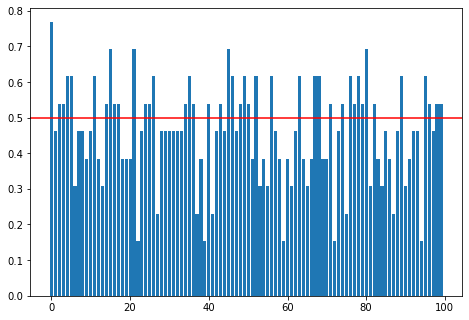

0.4607692307692308
**************************************************** 0.2
     --
Counter({1: 56, 0: 48})
     Pred:  [1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0]
     Data:  [0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1]
     ACC 0.4230769230769231
     F1 0.5161290322580646
     Recal 0.5714285714285714
     Precision 0.47058823529411764
     --
Counter({1: 55, 0: 49})
     Pred:  [0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0]
     Data:  [0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1]
     ACC 0.6153846153846154
     F1 0.6153846153846153
     Recal 0.5333333333333333
     Precision 0.7272727272727273
     --
Counter({1: 56, 0: 48})
     Pred:  [0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0]
     Data:  [1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1]
     ACC 0.4230769230769231
     F1 0.4444444444444445
     Recal 0.42857142857142855
     Precision 0.46153846153846156
     --
Counter({1: 56, 0: 48})
     Pred:  [0 1 1 1 1 1 0 0 1 0 1 1 0 0

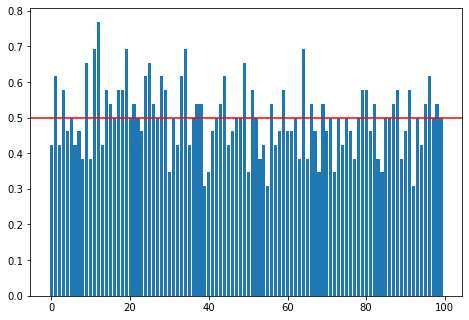

0.4976923076923079
**************************************************** 0.3
     --
Counter({1: 50, 0: 41})
     Pred:  [1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0
 1 1]
     Data:  [0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1
 1 0]
     ACC 0.4358974358974359
     F1 0.5
     Recal 0.55
     Precision 0.4583333333333333
     --
Counter({1: 48, 0: 43})
     Pred:  [1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0
 1 0]
     Data:  [0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1
 1 1]
     ACC 0.5384615384615384
     F1 0.5714285714285713
     Recal 0.5454545454545454
     Precision 0.6
     --
Counter({0: 47, 1: 44})
     Pred:  [0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 0 1]
     Data:  [0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1
 0 1]
     ACC 0.48717948717948717
     F1 0.5833333333333334
     Recal 0.5384615

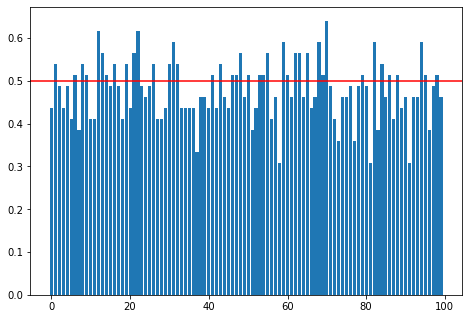

0.4787179487179484
**************************************************** 0.4
     --
Counter({1: 40, 0: 38})
     Pred:  [0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1
 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0]
     Data:  [0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1]
     ACC 0.4230769230769231
     F1 0.4
     Recal 0.3333333333333333
     Precision 0.5
     --
Counter({1: 46, 0: 32})
     Pred:  [1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1]
     Data:  [1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0]
     ACC 0.5384615384615384
     F1 0.6129032258064516
     Recal 0.7916666666666666
     Precision 0.5
     --
Counter({1: 44, 0: 34})
     Pred:  [1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0]
     Data:  [1 1 1 1 0 1 1 0 0 1 0 0 0 1

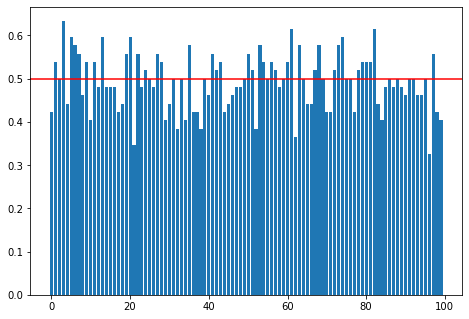

0.49326923076923074


In [19]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = neighbors.KNeighborsClassifier()           
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [20]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.4607692307692308
F1 0.5024646891636054
rec 0.5721327561327562
pres 0.4887954545454545
 
Av 0.4976923076923079
F1 0.5412100256133349
rec 0.582805239694946
pres 0.5251763696485834
 
Av 0.4787179487179484
F1 0.532513537873312
rec 0.5569500401413545
pres 0.5286354777231768
 
Av 0.49326923076923074
F1 0.5497377883892607
rec 0.5875146861357254
pres 0.5338021178550983
 


XGBClassifier

**************************************************** 0.1
     --
Counter({1: 63, 0: 54})
     Pred:  [1 0 1 0 1 1 1 0 1 0 1 1 1]
     Data:  [1 0 0 1 0 1 0 0 1 1 0 1 1]
     ACC 0.5384615384615384
     F1 0.6250000000000001
     Recal 0.7142857142857143
     Precision 0.5555555555555556
     --
Counter({1: 64, 0: 53})
     Pred:  [1 0 1 1 0 0 1 1 1 1 0 0 1]
     Data:  [0 0 0 0 0 1 1 1 1 0 1 1 0]
     ACC 0.38461538461538464
     F1 0.42857142857142855
     Recal 0.5
     Precision 0.375
     --
Counter({1: 62, 0: 55})
     Pred:  [1 1 1 1 1 1 0 1 0 1 0 1 1]
     Data:  [0 0 1 1 0 1 0 1 0 1 1 1 1]
     ACC 0.6923076923076923
     F1 0.7777777777777777
     Recal 0.875
     Precision 0.7
     --
Counter({1: 62, 0: 55})
     Pred:  [0 0 1 0 1 0 0 0 1 1 1 1 1]
     Data:  [1 0 1 1 1 1 0 1 0 1 1 0 0]
     ACC 0.46153846153846156
     F1 0.5333333333333333
     Recal 0.5
     Precision 0.5714285714285714
     --
Counter({1: 63, 0: 54})
     Pred:  [1 1 0 0 1 0 1 1 0 0 1 1 1]
     Data:  [1 

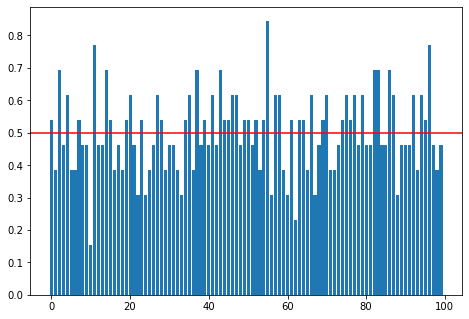

0.5015384615384615
**************************************************** 0.2
     --
Counter({1: 55, 0: 49})
     Pred:  [0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1]
     Data:  [0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0]
     ACC 0.6153846153846154
     F1 0.6666666666666666
     Recal 0.6666666666666666
     Precision 0.6666666666666666
     --
Counter({1: 55, 0: 49})
     Pred:  [0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1]
     Data:  [1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1]
     ACC 0.6538461538461539
     F1 0.7096774193548386
     Recal 0.7333333333333333
     Precision 0.6875
     --
Counter({1: 58, 0: 46})
     Pred:  [1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0]
     Data:  [1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1]
     ACC 0.5
     F1 0.5517241379310345
     Recal 0.6666666666666666
     Precision 0.47058823529411764
     --
Counter({1: 56, 0: 48})
     Pred:  [0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1]
   

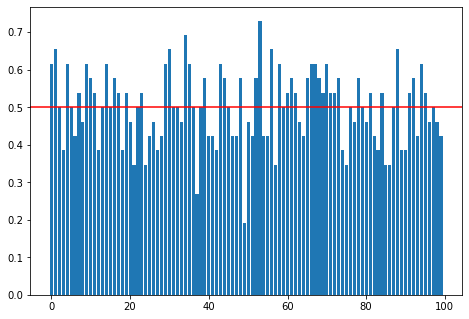

0.4992307692307694
**************************************************** 0.3
     --
Counter({1: 47, 0: 44})
     Pred:  [0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1
 1 0]
     Data:  [1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1
 0 1]
     ACC 0.46153846153846156
     F1 0.46153846153846156
     Recal 0.391304347826087
     Precision 0.5625
     --
Counter({1: 50, 0: 41})
     Pred:  [0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0
 1 1]
     Data:  [1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0
 0 0]
     ACC 0.5128205128205128
     F1 0.5957446808510639
     Recal 0.7
     Precision 0.5185185185185185
     --
Counter({1: 51, 0: 40})
     Pred:  [0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0
 1 1]
     Data:  [0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0
 0 1]
     ACC 0.4358974358974359
     F1 0.45
     Recal 0.4736

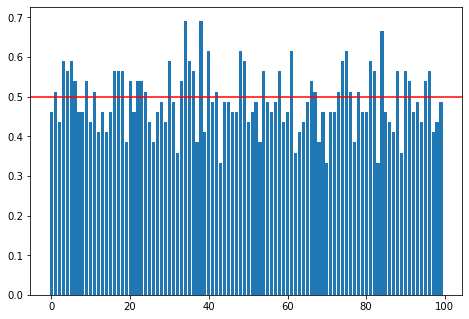

0.49128205128205105
**************************************************** 0.4
     --
Counter({1: 43, 0: 35})
     Pred:  [1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0]
     Data:  [1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1]
     ACC 0.5
     F1 0.59375
     Recal 0.7037037037037037
     Precision 0.5135135135135135
     --
Counter({1: 46, 0: 32})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1]
     Data:  [0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1]
     ACC 0.46153846153846156
     F1 0.5757575757575758
     Recal 0.7916666666666666
     Precision 0.4523809523809524
     --
Counter({1: 43, 0: 35})
     Pred:  [0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1]
     Data:  [0 0 0 

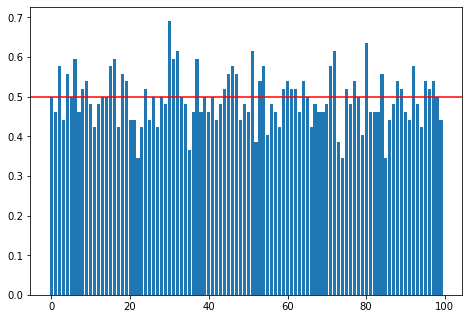

0.49480769230769234


In [10]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA


        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = xgb.XGBClassifier(max_depth=6,learning_rate=0.1,n_estimators=50,
                                            objective='binary:logistic',booster='gbtree',n_jobs=20,
                                            subsample=0.9, colsample_bytree=0.9, colsample_bylevel=0.9,
                                            reg_alpha=0.5, reg_lambda=1.0,gamma=0,
                                            scale_pos_weight=1)           
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [11]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.5015384615384615
F1 0.5368841603872561
rec 0.581751443001443
pres 0.5431875346875348
 
Av 0.4992307692307694
F1 0.5424114383496385
rec 0.5539050989859813
pres 0.5520947580970802
 
Av 0.49128205128205105
F1 0.5462628195472984
rec 0.5734153825284364
pres 0.5399468494048363
 
Av 0.49480769230769234
F1 0.5458064531045348
rec 0.5929622186311557
pres 0.5276293757015187
 


Random forest classifier

**************************************************** 0.1
     --
Counter({1: 63, 0: 54})
     Pred:  [1 1 1 1 0 0 0 1 1 0 0 1 0]
     Data:  [1 1 1 0 0 1 0 0 1 1 0 1 0]
     ACC 0.6923076923076923
     F1 0.7142857142857143
     Recal 0.7142857142857143
     Precision 0.7142857142857143
     --
Counter({1: 61, 0: 56})
     Pred:  [1 1 0 1 1 0 0 1 1 0 1 1 1]
     Data:  [1 1 0 1 1 1 0 1 1 1 0 1 0]
     ACC 0.6923076923076923
     F1 0.7777777777777778
     Recal 0.7777777777777778
     Precision 0.7777777777777778
     --
Counter({1: 60, 0: 57})
     Pred:  [0 1 1 1 1 1 1 0 1 1 1 0 1]
     Data:  [1 1 1 1 1 1 0 1 1 1 1 0 0]
     ACC 0.6923076923076923
     F1 0.8000000000000002
     Recal 0.8
     Precision 0.8
     --
Counter({1: 63, 0: 54})
     Pred:  [0 1 1 1 0 0 0 1 1 1 0 1 0]
     Data:  [0 0 0 1 0 1 0 1 1 1 0 1 1]
     ACC 0.6923076923076923
     F1 0.7142857142857143
     Recal 0.7142857142857143
     Precision 0.7142857142857143
     --
Counter({1: 62, 0: 55})
     Pred:  [1 0 

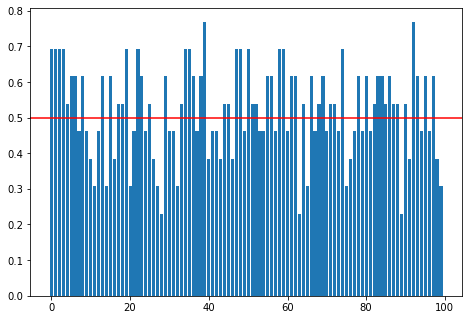

0.5230769230769229
**************************************************** 0.2
     --
Counter({1: 58, 0: 46})
     Pred:  [1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0]
     Data:  [0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1]
     ACC 0.3076923076923077
     F1 0.4375
     Recal 0.5833333333333334
     Precision 0.35
     --
Counter({1: 55, 0: 49})
     Pred:  [1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0]
     Data:  [0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0]
     ACC 0.5
     F1 0.5517241379310344
     Recal 0.5333333333333333
     Precision 0.5714285714285714
     --
Counter({1: 58, 0: 46})
     Pred:  [0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0]
     Data:  [1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0]
     ACC 0.5384615384615384
     F1 0.5384615384615384
     Recal 0.5833333333333334
     Precision 0.5
     --
Counter({1: 56, 0: 48})
     Pred:  [0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1]
     Data:  [0 1 1 0 1 1 1 1 0 1 

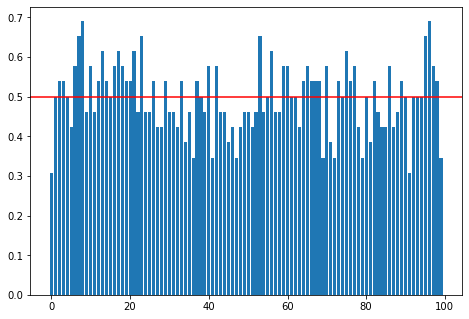

0.49730769230769234
**************************************************** 0.3
     --
Counter({0: 47, 1: 44})
     Pred:  [1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0]
     Data:  [1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 0 1]
     ACC 0.38461538461538464
     F1 0.4
     Recal 0.3076923076923077
     Precision 0.5714285714285714
     --
Counter({1: 51, 0: 40})
     Pred:  [0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 0 0]
     Data:  [0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0
 0 0]
     ACC 0.6153846153846154
     F1 0.6666666666666666
     Recal 0.7894736842105263
     Precision 0.5769230769230769
     --
Counter({0: 46, 1: 45})
     Pred:  [0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1
 0 0]
     Data:  [1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0
 1 0]
     ACC 0.358974358974359
     F1 0.41860465

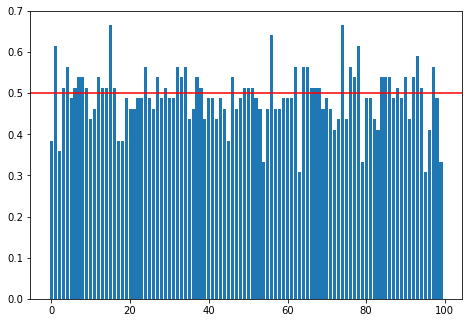

0.49025641025641015
**************************************************** 0.4
     --
Counter({1: 42, 0: 36})
     Pred:  [1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1]
     Data:  [1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1
 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1]
     ACC 0.6538461538461539
     F1 0.689655172413793
     Recal 0.7142857142857143
     Precision 0.6666666666666666
     --
Counter({1: 42, 0: 36})
     Pred:  [1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0]
     Data:  [0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]
     ACC 0.46153846153846156
     F1 0.44
     Recal 0.39285714285714285
     Precision 0.5
     --
Counter({1: 42, 0: 36})
     Pred:  [1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
     Data:  [1 0 1 0 0

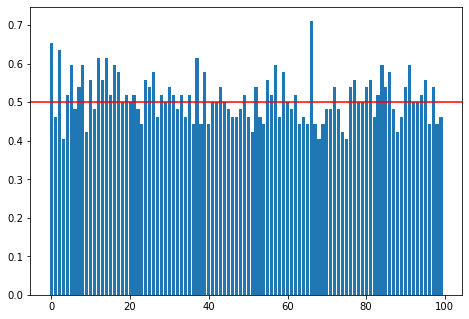

0.5098076923076924


In [12]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = RandomForestClassifier(max_depth=30, random_state=0)       
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [13]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.5230769230769229
F1 0.5521851041974878
rec 0.5929646464646462
pres 0.5621370851370852
 
Av 0.49730769230769234
F1 0.5346847753305615
rec 0.566811534054181
pres 0.5353689185341658
 
Av 0.49025641025641015
F1 0.5367600666683894
rec 0.5591913510013907
pres 0.5399829079471171
 
Av 0.5098076923076924
F1 0.5522523674686662
rec 0.579690968157432
pres 0.5435008593939804
 


gaussian nb

**************************************************** 0.1
     --
Counter({1: 62, 0: 55})
     Pred:  [0 1 0 1 0 0 1 1 1 0 1 1 0]
     Data:  [0 1 0 1 1 1 0 1 1 1 0 0 1]
     ACC 0.46153846153846156
     F1 0.5333333333333333
     Recal 0.5
     Precision 0.5714285714285714
     --
Counter({1: 62, 0: 55})
     Pred:  [0 1 0 0 1 0 0 0 1 1 0 1 1]
     Data:  [1 0 0 1 1 1 0 0 1 0 1 1 1]
     ACC 0.5384615384615384
     F1 0.5714285714285715
     Recal 0.5
     Precision 0.6666666666666666
     --
Counter({1: 60, 0: 57})
     Pred:  [1 1 1 1 0 1 1 0 1 0 0 1 1]
     Data:  [1 1 1 0 0 1 1 1 1 1 1 0 1]
     ACC 0.6153846153846154
     F1 0.7368421052631577
     Recal 0.7
     Precision 0.7777777777777778
     --
Counter({1: 62, 0: 55})
     Pred:  [0 0 1 0 0 0 0 1 0 0 1 1 0]
     Data:  [0 1 1 1 0 1 0 0 1 0 1 1 1]
     ACC 0.5384615384615384
     F1 0.5
     Recal 0.375
     Precision 0.75
     --
Counter({1: 65, 0: 52})
     Pred:  [1 0 1 1 0 1 1 1 1 1 0 1 1]
     Data:  [1 0 0 0 1 0 1 0 0 0 

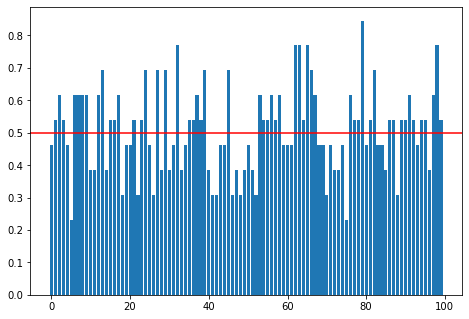

0.51
**************************************************** 0.2
     --
Counter({1: 56, 0: 48})
     Pred:  [1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]
     Data:  [0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0]
     ACC 0.34615384615384615
     F1 0.48484848484848486
     Recal 0.5714285714285714
     Precision 0.42105263157894735
     --
Counter({1: 53, 0: 51})
     Pred:  [0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1]
     Data:  [1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0]
     ACC 0.46153846153846156
     F1 0.6111111111111113
     Recal 0.6470588235294118
     Precision 0.5789473684210527
     --
Counter({1: 56, 0: 48})
     Pred:  [1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
     Data:  [0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1]
     ACC 0.46153846153846156
     F1 0.6111111111111112
     Recal 0.7857142857142857
     Precision 0.5
     --
Counter({1: 55, 0: 49})
     Pred:  [0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1]
 

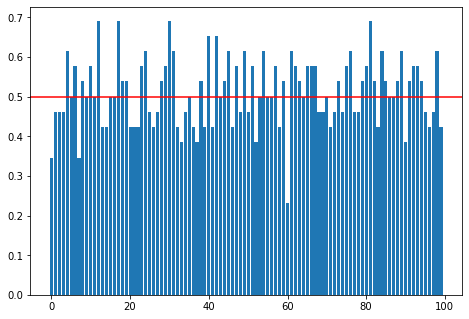

0.5119230769230769
**************************************************** 0.3
     --
Counter({1: 47, 0: 44})
     Pred:  [1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0
 1 1]
     Data:  [0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0
 1 0]
     ACC 0.46153846153846156
     F1 0.46153846153846156
     Recal 0.391304347826087
     Precision 0.5625
     --
Counter({1: 49, 0: 42})
     Pred:  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1
 1 1]
     Data:  [0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1
 0 1]
     ACC 0.5641025641025641
     F1 0.6792452830188678
     Recal 0.8571428571428571
     Precision 0.5625
     --
Counter({1: 51, 0: 40})
     Pred:  [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1]
     Data:  [1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1
 1 1]
     ACC 0.5384615384615384
     F1 0.6666666666666666


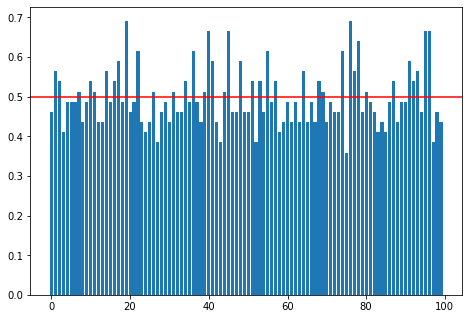

0.4982051282051281
**************************************************** 0.4
     --
Counter({0: 41, 1: 37})
     Pred:  [0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1]
     Data:  [1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0]
     ACC 0.5769230769230769
     F1 0.6206896551724138
     Recal 0.5454545454545454
     Precision 0.72
     --
Counter({1: 41, 0: 37})
     Pred:  [1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1]
     Data:  [0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1]
     ACC 0.5192307692307693
     F1 0.576271186440678
     Recal 0.5862068965517241
     Precision 0.5666666666666667
     --
Counter({1: 46, 0: 32})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1]
     Data:

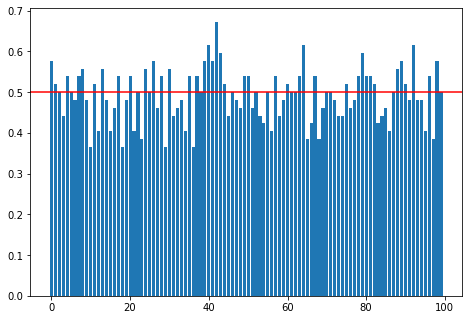

0.49307692307692336


In [14]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = GaussianNB()       
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [15]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.51
F1 0.5713715778545495
rec 0.6359761904761906
pres 0.5563235930735929
 
Av 0.5119230769230769
F1 0.5843846686734548
rec 0.6624401952536628
pres 0.5586416096429556
 
Av 0.4982051282051281
F1 0.5670032085579624
rec 0.6377693346421404
pres 0.5450612144061252
 
Av 0.49307692307692336
F1 0.5488307009648521
rec 0.6042400354795303
pres 0.5524278880190031
 
